# Clusterning

- Simulator-https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/ 
- RAW Implementation- https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

- Analytics Vidhya Article https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/


[Euclidean distance & Manhattan Distance intuition video](https://www.youtube.com/watch?v=p3HbBlcXDTE&list=PLZoTAELRMXVPBTrWtJkn3wWQxZkmTXGwe&index=63)

# Types of Clustering
Broadly speaking, clustering can be divided into two subgroups :

- <b>Hard Clustering</b>: In hard clustering, each data point either belongs to a cluster completely or not. For example, in the above example each customer is put into one group out of the 10 groups.


- <b>Soft Clustering</b>: In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. For example, from the above scenario each costumer is assigned a probability to be in either of 10 clusters of the retail store.

# Types of clustering algorithms
Since the task of clustering is subjective, the means that can be used for achieving this goal are plenty. Every methodology follows a different set of rules for defining the ‘similarity’ among data points. In fact, there are more than 100 clustering algorithms known. But few of the algorithms are used popularly, let’s look at them in detail:

- <b>Connectivity models</b>: As the name suggests, these models are based on the notion that the data points closer in data space exhibit more similarity to each other than the data points lying farther away. These models can follow two approaches. In the first approach, they start with classifying all data points into separate clusters & then aggregating them as the distance decreases. In the second approach, all data points are classified as a single cluster and then partitioned as the distance increases. Also, the choice of distance function is subjective. These models are very easy to interpret but lacks scalability for handling big datasets. Examples of these models are <font color="blue">hierarchical clustering</font> algorithm and its variants.


- <b>Centroid models</b>: These are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters. <font color="blue">K-Means</font> clustering algorithm is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.


- <b>Distribution models</b>: These clustering models are based on the notion of how probable is it that all data points in the cluster belong to the same distribution (For example: Normal, Gaussian). These models often suffer from overfitting. A popular example of these models is <font color="blue">Expectation-maximization</font> algorithm which uses multivariate normal distributions.


- <b>Density Models</b>: These models search the data space for areas of varied density of data points in the data space. It isolates various different density regions and assign the data points within these regions in the same cluster. Popular examples of density models are <font color="blue">DBSCAN and OPTICS.</font>

# K Means


The way kmeans algorithm works is as follows:
1. Specify number of clusters K.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
4. Compute the sum of the squared distance between data points and all centroids.
5. Assign each data point to the closest cluster (centroid).
6. Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

##### Important points

- Since clustering algorithms including kmeans use distance-based measurements to determine the similarity between data points, it’s recommended to standardize the data to have a mean of zero and a standard deviation of one since almost always the features in any dataset would have different units of measurements such as age vs income.


- Given kmeans iterative nature and the random initialization of centroids at the start of the algorithm, different initializations may lead to different clusters since kmeans algorithm may stuck in a local optimum and may not converge to global optimum. Therefore, it’s recommended to run the algorithm using different initializations of centroids and pick the results of the run that that yielded the lower sum of squared distance.


- In case Multi dimension data it is better to apply PCA before K means as It help us reduce distance calculation time. 

- it is common to run the k-means algorithm multiple times with different initial cluster centers. The time complexity of the k-means algorithm is $O(nkt)$ where n is the total number of objects, k is the number of clusters, and t is the number of iterations. Normally, k <<n and t<<n. Therefore, the method is relatively scalable and efficient in processing large data sets

- <b>“How can we make the k-means algorithm more scalable?”</b> One approach to making
the k-means method more efficient on large data sets is to use a good-sized set of
samples in clustering. Another is to employ a filtering approach that uses a spatial hierarchical data index to save costs when computing means. A third approach explores the
microclustering idea, which first groups nearby objects into “microclusters” and then
performs k-means clustering on the microclusters.

### Raw Implementation

In [2]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

[On paper solution Video](https://www.youtube.com/watch?v=YWgcKSa_2ag)

In [14]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.utils import check_random_state

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


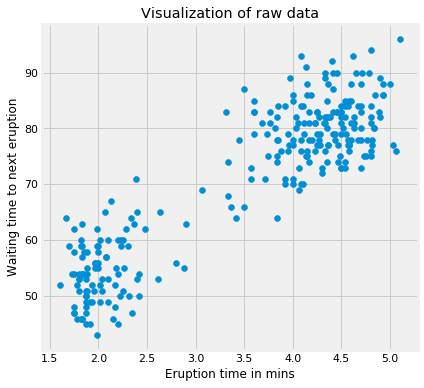

In [78]:
# Import the data
df = pd.read_csv('dataset-44970.csv')

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

In [79]:
# Standardize the data
X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans and by default intial centroid define by Kmeans++
km = KMeans(n_clusters=2, max_iter=100,n_jobs=-1)
km.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
centroids = km.cluster_centers_
centroids

array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]])

In [81]:
km.labels_

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0])

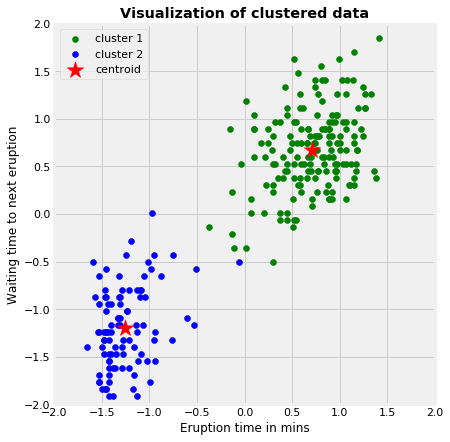

In [82]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(8, 7))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In the above visualization, the color of the small data points represents the cluster to which they have been assigned. The larger circles are the cluster centroids, with their color indicating the cluster that they represent. For illustrative purposes, I've also shaded subregions depending on which centroid they are closest to. This is called a [Voronoi](https://en.wikipedia.org/wiki/Voronoi_diagram) diagram.

##### Using Randomly assign the intial centroid

In [83]:
def random_centroid_init(data):
    n_iter = 9
    fig, ax = plt.subplots(3, 3, figsize=(16, 16))
    ax = np.ravel(ax)
    centers = []
    random_state=0
    for i in range(n_iter):
        # Run local implementation of kmeans
        state=np.random.randint(0, 1000, size=1)
        state=int(state)
        random_state = check_random_state(state)
        km = KMeans(n_clusters=2,
                    init='random',
                    max_iter=3,
                    random_state=random_state,n_jobs=-1)
        km.fit(data)
        centroids = km.cluster_centers_
        centers.append(centroids)
        ax[i].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                      c='green', label='cluster 1')
        ax[i].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                      c='blue', label='cluster 2')
        ax[i].scatter(centroids[:, 0], centroids[:, 1],
                      c='r', marker='*', s=300, label='centroid')
        ax[i].set_xlim([-2, 2])
        ax[i].set_ylim([-2, 2])
        ax[i].legend(loc='lower right')
        ax[i].set_title(f'{km.inertia_:.4f}'+"& State:="+str(state))
        ax[i].set_aspect('equal')
    plt.tight_layout();



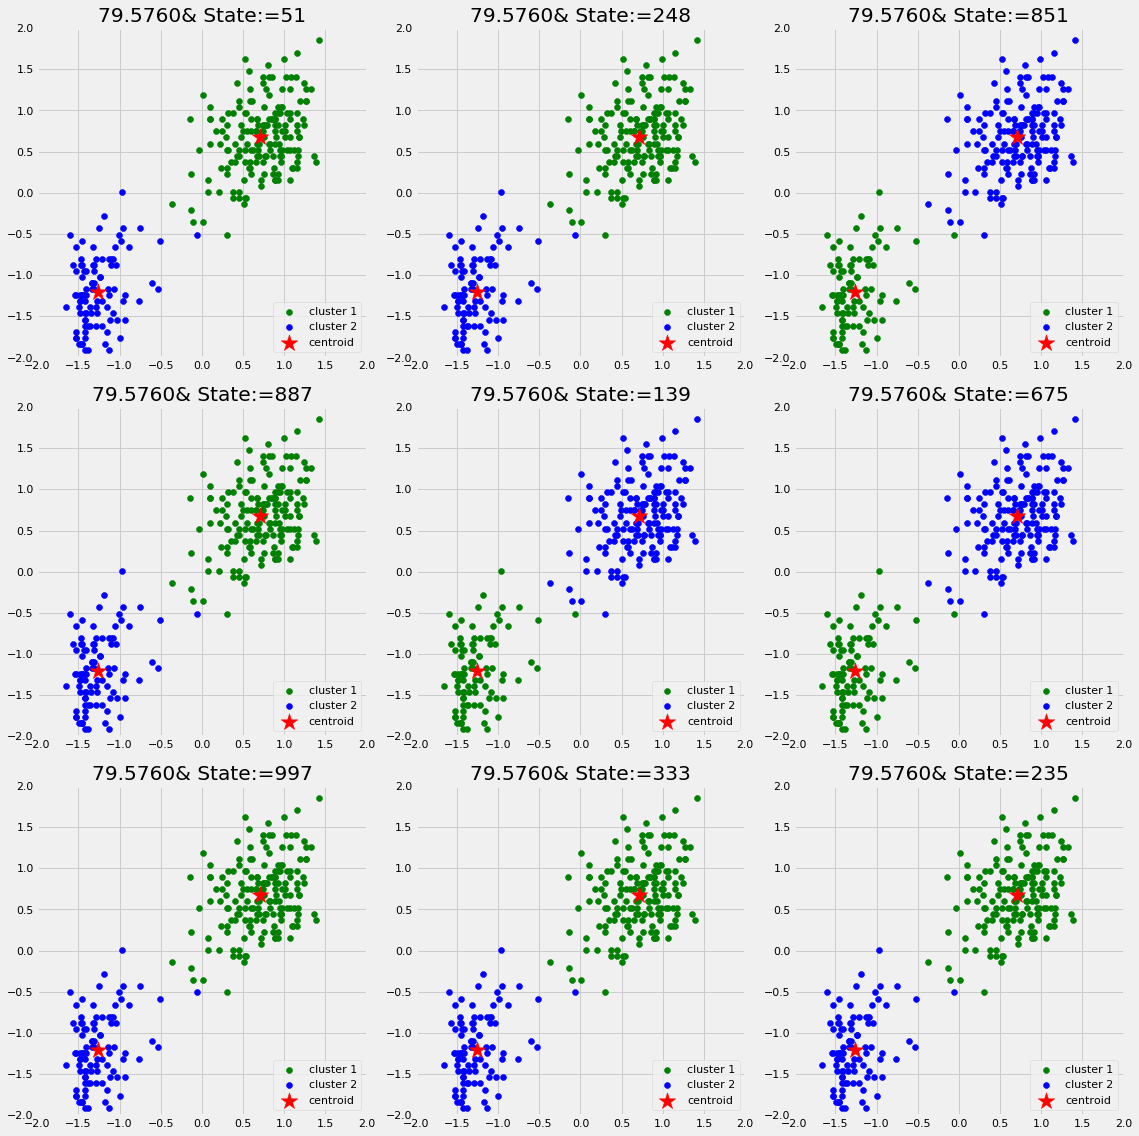

In [54]:
random_centroid_init(X_std)

Observations
- In the real time data would not be that consistant as Chaging the intial centorid value will end to different clusters figure

 <b>k-means++</b>. It works similarly to the "farthest" heuristic, except that instead of choosing the jth centroid to be the point furthest from the preceding centroids, it selects a point with probability proportional to the square of its distance to the nearest preceding centroid. This makes some sense: If you pick the farthest point, you often get points that are at the edges of their true clusters, but if you choose randomly as described, then you're more likely to get one near the center of the true cluster. (Indeed, the authors even proved that this initialization results in a clustering that in expectation is suboptimal by at most a <font color='blue'>log(k)</font> factor)!

### Kmeans on Image Compression

In [11]:
# Read the image
from skimage.io import imread
from skimage import img_as_float
img = imread('Photo.jpg')
img_size = img.shape
print(img_size)

(450, 363, 3)


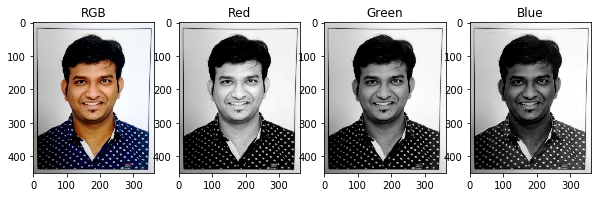

In [12]:
from pylab import *
%matplotlib inline
img_f = img_as_float(img)
w, h = img_f.shape[:2]
R = img_f[:,:,0]
G = img_f[:,:,1]
B = img_f[:,:,2]
figure(figsize=(10,7))
gray()
subplot(1,4,1); imshow(img_f); title("RGB")
subplot(1,4,2); imshow(R); title("Red")
subplot(1,4,3); imshow(G); title("Green")
subplot(1,4,4); imshow(B); title("Blue")
show()   

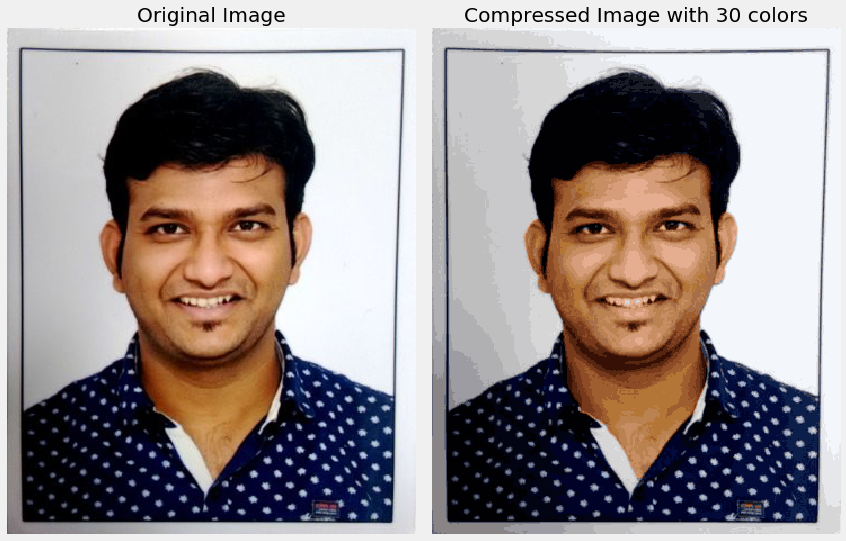

In [15]:
# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

# Run the Kmeans algorithm
km = KMeans(n_clusters=30)
km.fit(X)

# Use the centroids to compress the image
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

### Evaluation
- Elbow method
- Silhouette analysis

#### Elbow Method

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. We’ll use the geyser dataset and evaluate SSE for different values of k and see where the curve might form an elbow and flatten out.

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
X = iris.data
y = iris.target
cols = iris.feature_names

In [70]:
iris_df = pd.concat([pd.DataFrame(X, columns = cols),
                     pd.DataFrame(y, columns = ['Species'])], 
                    axis=1)

In [71]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [72]:
iris_df['Species'].unique()

array([0, 1, 2], dtype=int64)

Text(0, 0.5, 'With in cluster sum of Squared Distance(WCSS)')

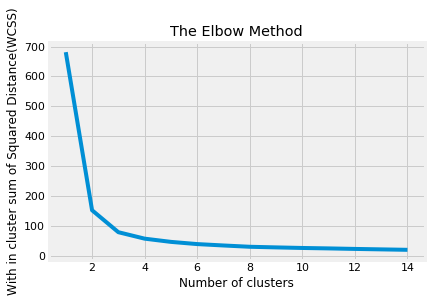

In [73]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_jobs = -1, 
                    random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('With in cluster sum of Squared Distance(WCSS)')

As per the above elbow plot, we can see within cluster sum of Squared distance not changing much post 3 clusters.

Hence , We will create 3 clusters

In [74]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [75]:
iris_df = pd.concat([iris_df,
                     pd.DataFrame(y_kmeans, columns=['Clusters'])], 
                    axis=1)

In [76]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Clusters
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [77]:
pd.crosstab(iris_df.Species,iris_df.Clusters) # We have more missclassification

Clusters,0,1,2
Species,,,
0,0,50,0
1,48,0,2
2,14,0,36


In [ ]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv', index_col=0)

In [ ]:
dataset.head()

In [ ]:
dataset.describe()

In [42]:
X = dataset.iloc[:, [2, 3]].values #considering only last 2 column

Text(0, 0.5, 'WCSS')

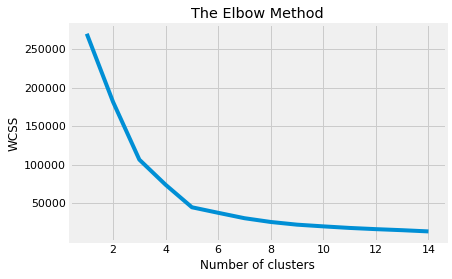

In [43]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_jobs = -1, 
                    random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [44]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', 
                random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [45]:
kmeans.n_iter_

3

In [19]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [20]:
np.unique(y_kmeans)

array([0, 1, 2, 3, 4], dtype=int32)

In [46]:
cluster_df = pd.concat([pd.DataFrame(dataset.iloc[:,:].values, columns=dataset.columns),
                        pd.DataFrame(y_kmeans, columns=['Clusters'])], 
                       axis=1)

In [47]:
cluster_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


In [48]:
for k,v in cluster_df.groupby('Clusters'):
    print('Cluster: ',k)
    print(v.head())

Cluster:  0
    Gender Age Annual Income (k$) Spending Score (1-100)  Clusters
43  Female  31                 39                     61         0
46  Female  50                 40                     55         0
47  Female  27                 40                     47         0
48  Female  29                 40                     42         0
49  Female  31                 40                     42         0
Cluster:  1
     Gender Age Annual Income (k$) Spending Score (1-100)  Clusters
124  Female  23                 70                     29         1
128    Male  59                 71                     11         1
130    Male  47                 71                      9         1
134    Male  20                 73                      5         1
136  Female  44                 73                      7         1
Cluster:  2
   Gender Age Annual Income (k$) Spending Score (1-100)  Clusters
0    Male  19                 15                     39         2
2  Female  20         

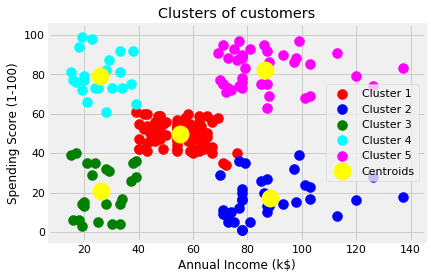

In [49]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

#### Silhouette Analysis

Silhouette analysis can be used to determine the degree of separation between clusters. 

For each sample:
- Compute the average distance from all data points in the same cluster (ai).
- Compute the average distance from all data points in the closest cluster (bi).
- compute Cofficient $bi-ai/(max(bi,ai))$

The coefficient can take values in the interval [-1, 1].
- If it is 0 –> the sample is very close to the neighboring clusters.
- It it is 1 –> the sample is far away from the neighboring clusters.
- It it is -1 –> the sample is assigned to the wrong clusters.


Therefore, we want the coefficients to be as big as possible and close to 1 to have a good clusters. We’ll use here geyser dataset again because its cheaper to run the silhouette analysis and it is actually obvious that there is most likely only two groups of data points.

<img src="SL.PNG">

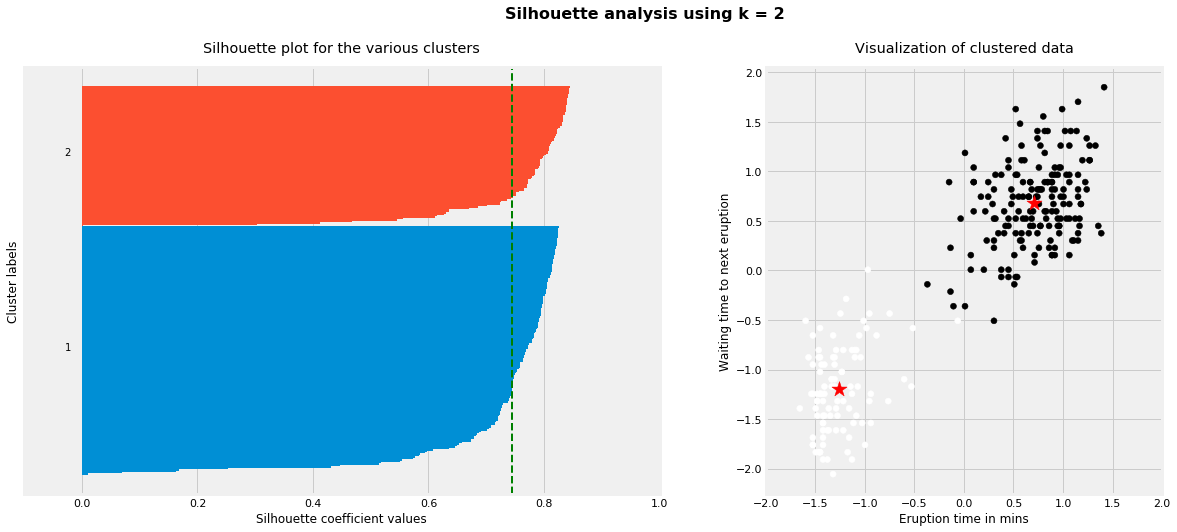

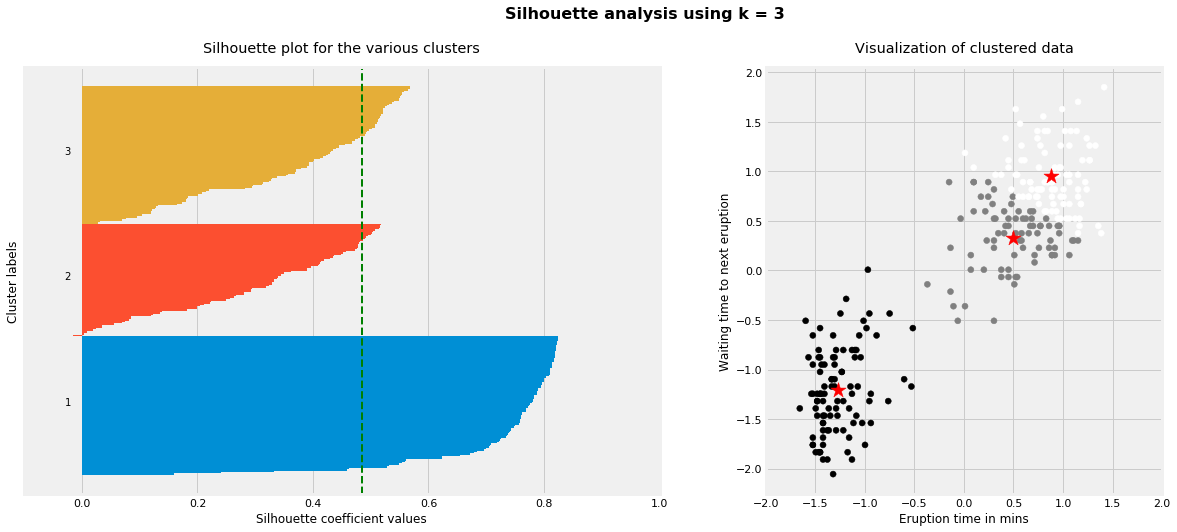

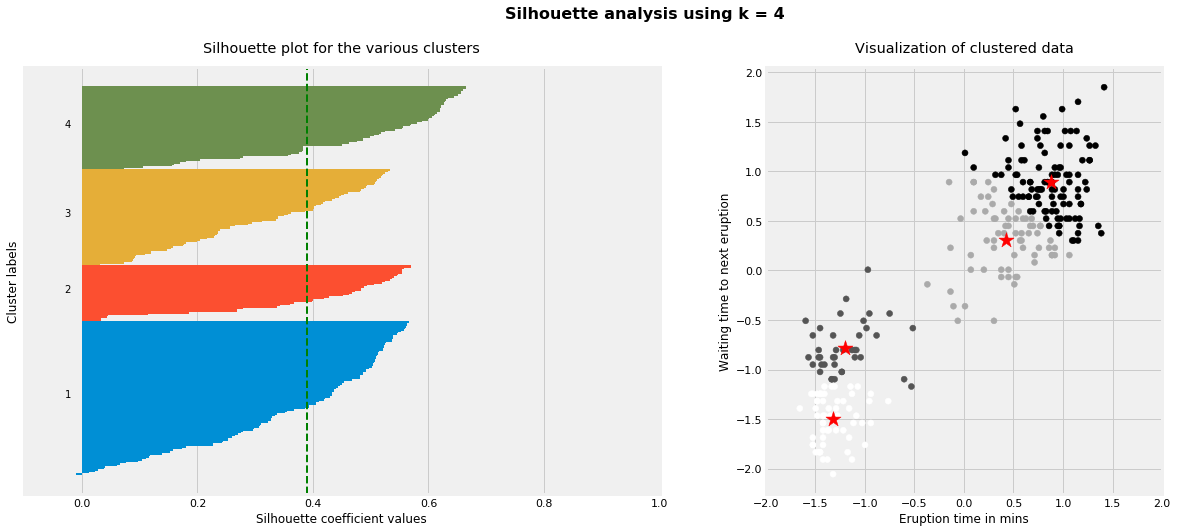

In [85]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

- As the above plots show, n_clusters=2 has the best average silhouette score of around 0.75 and all clusters being above the average shows that it is actually a good choice. 

- Also, the thickness of the silhouette plot gives an indication of how big each cluster is. The plot shows that cluster 1 has almost double the samples than cluster 2. 

- However, as we increased n_clusters to 3 and 4, the average silhouette score decreased dramatically to around 0.48 and 0.39 respectively. Moreover, the thickness of silhouette plot started showing wide fluctuations. 

- The bottom line is: Good n_clusters will have a well above 0.5 silhouette average score as well as all of the clusters have higher than the average score.

# K-median or Mediods

In statistics and data mining, <font color="blue"><b>k-medians/medoids or PAM (Partition around medoids) clustering</b></font> is a cluster analysis algorithm. It is a variation of k-means clustering where instead of calculating the mean for each cluster to determine its centroid, one instead calculates the median. This has the effect of minimizing error over all clusters with respect to the 1-norm distance metric, as opposed to the squared 2-norm distance metric (which k-means does.)

[On-paper solution on K-median/medoids](https://www.youtube.com/watch?v=AUriFHKw0TU)

[Python implementation](https://towardsdatascience.com/k-medoids-clustering-on-iris-data-set-1931bf781e05)

- K-means is more sensitive to outlier as compare to K-median.

- <b>“How can we modify the k-means algorithm to diminish such sensitivity to outliers?”</b>
Instead of taking the mean value of the objects in a cluster as a reference point, we can
pick actual objects to represent the clusters, using one representative object per cluster.
Each remaining object is assigned to the cluster of which the representative object is
the most similar.

- <b>“Which method is more robust—k-means or k-medoids?”</b> The k-medoids method is
more robust than k-means in the presence of noise and outliers because a medoid is less
influenced by outliers or other extreme values than a mean. However, the complexity
of each iteration in the k-medoids algorithm is $O(k(n-k)power(2))$

- <b>“How can we scale up the k-medoids method?”</b> A typical k-medoids partitioning algorithm
like PAM (Figure 10.5) works effectively for small data sets, but does not scale well
for large data sets. To deal with larger data sets, a sampling-based method called CLARA
(Clustering LARge Applications) can be used.  The complexity of computing the medoids on
a random sample is $O(k(spower(2))+k(n-k))$

- <b>“How can we scale up the k-medoids method?”</b> A typical k-medoids partitioning algorithm like PAM (Figure 10.5) works effectively for small data sets, but does not scale well for large data sets. To deal with larger data sets, a sampling-based method called <font color="blue">CLARA (Clustering LARge Applications)</font> can be used. Instead of taking the whole data set into
consideration, CLARA uses a randomsample of the data set. The PAM algorithm is then
applied to compute the best medoids fromthe sample. Ideally, the sample should closely
represent the original data set. In many cases, a large sample works well if it is created so that each object has equal probability of being selected into the sample.

- <b>“How might we improve the quality and scalability of CLARA?”</b> Recall that when
searching for better medoids, PAM examines every object in the data set against every
current medoid, whereas CLARA confines the candidate medoids to only a random
sample of the data set. A randomized algorithm called <font color="blue">CLARANS (Clustering Large Applications based upon RANdomized Search)</font> presents a trade-off between the cost and the effectiveness of using samples to obtain clustering.
First, it randomly selects k objects in the data set as the current medoids. It then
randomly selects a current medoid x and an object y that is not one of the current
medoids. Can replacing x by y improve the absolute-error criterion? If yes, the replacement
is made. CLARANS conducts such a randomized search l times. The set of the
current medoids after the l steps is considered a local optimum. CLARANS repeats this
randomized process m times and returns the best local optimal as the final result.

# Hierarchical Clustering

Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters.This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

[Hierarchical Clustering intuition Video](https://www.youtube.com/watch?v=0jPGHniVVNc&list=PLZoTAELRMXVPBTrWtJkn3wWQxZkmTXGwe&index=65)

It is classified in two types..

1. <b>Agglomerative(Bottom up approach)</b>- Start with each point as separate group/cluster then each successive merges the objects/group close to one another,until all group are merged into one.
2. <b>Divisive(Top down approach)</b>-- Start with all objects in same cluster then each successive iteration split into smaller cluster until each object in one cluster.

At the bottom, we start with 25 data points, each assigned to separate clusters. Two closest clusters are then merged till we have just one cluster at the top. The height in the dendrogram at which two clusters are merged represents the distance between two clusters in the data space.

The decision of the no. of clusters that can best depict different groups can be chosen by observing the dendrogram. The best choice of the no. of clusters is the no. of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.

In the below example, the best choice of no. of clusters will be 4 as the red horizontal line in the dendrogram below covers maximum vertical distance AB.



<img src="H_clust.png">

Type of Algorithm...

- single Linkage(min distance/nearest-neighor clusterning algorithm)
- complete Linkage(max distance/farthest-neighbor clustering algorithm)
- Gorup avg distance/Avg Linkage
- Distance between centroid or Centroid Linkage


<b>Single versus complete linkages</b>. Let us apply hierarchical clustering to the data set of
Figure 10.8(a). Figure 10.8(b) shows the dendrogram using single linkage. Figure 10.8(c)
shows the case using complete linkage, where the edges between clusters {A,B, J ,H} and
{C,D,G,F,E} are omitted for ease of presentation. This example shows that by using
single linkages we can find hierarchical clusters defined by local proximity, whereas
complete linkage tends to find clusters opting for global closeness.

<img src="Linkage.PNG">

Text(0, 0.5, 'Euclidean distances')

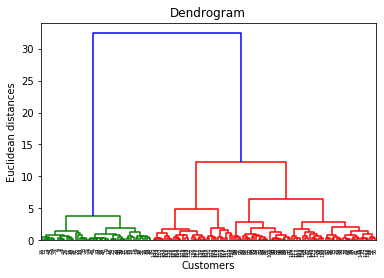

In [8]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [51]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, 
                             affinity = 'euclidean', 
                             linkage = 'ward')
y_hc = hc.fit_predict(X)

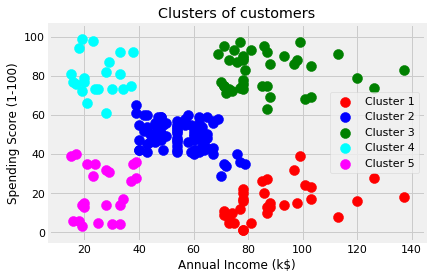

In [52]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()


## Difference between K Means and Hierarchical clustering
- Hierarchical clustering can’t handle big data well but K Means clustering can. This is because the time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2).


- In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering.


- K Means is found to work well when the shape of the clusters is hyper spherical (like circle in 2D, sphere in 3D).


- K Means clustering requires prior knowledge of K i.e. no. of clusters you want to divide your data into. But, you can stop at whatever number of clusters you find appropriate in hierarchical clustering by interpreting the dendrogram

- Hierarchical methods suffer from the fact that once a step(merge or split) is done, it can never be undone.

## Applications of Clustering
Clustering has a large no. of applications spread across various domains. Some of the most popular applications of clustering are:

- Recommendation engines
- Market segmentation
- Social network analysis
- Search result grouping
- Medical imaging
- Image segmentation
- Anomaly detection

## BIRCH: Multiphase Hierarchical Clustering Using Clustering Feature Trees(CF tree)

Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) is designed for
clustering a large amount of numeric data by integrating hierarchical clustering (at the
initial microclustering stage) and other clustering methods such as iterative partitioning
(at the later macroclustering stage). It overcomes the two difficulties in agglomerative
clustering methods: (1) scalability and (2) the inability to undo what was done in the
previous step.

# DBSCAN

- It work well in Arbitrary shape where as Kmeans will work well on spherical shape

- Their general idea is to continue growing a given cluster as long as the density (number of objects or data points) in the “neighborhood” exceeds some threshold. 

For example, for each data point within a given cluster, the neighborhood of a given radius has to contain at least a minimum number of points. Such a method can be used to filter out noise
or outliers and discover clusters of arbitrary shape.

[DBSCAN Intuition video](https://www.youtube.com/watch?v=C3r7tGRe2eI&list=PLZoTAELRMXVPBTrWtJkn3wWQxZkmTXGwe&index=66)

<h3>Method General Characteristics</h3>

<b>Partitioning methods</b>
- Find mutually exclusive clusters of spherical shape
- Distance-based
- May use mean or medoid (etc.) to represent cluster center
- Effective for small- to medium-size data sets


<b>Hierarchical methods</b>
- Clustering is a hierarchical decomposition (i.e., multiple levels)
- Cannot correct erroneous merges or splits
- May incorporate other techniques like microclustering or consider object “linkages”


<b>Density-based methods</b>
- Can find arbitrarily shaped clusters
- Clusters are dense regions of objects in space that are
separated by low-density regions
- Cluster density: Each point must have a minimum number of
points within its “neighborhood”
- May filter out outliers


<b>Grid-based methods</b>
- Use a multiresolution grid data structure
- Fast processing time (typically independent of the number of data objects, yet dependent on grid size)

[Python implementation](https://github.com/krishnaik06/DBSCAN-Algorithm)

<img src="DBSCAN.PNG">

- Epsilon--It is a radius to draw a circle
- Core point-- If circle satisfy the min point condition (as >=4) then it is core point
- Border point---does not satisfy the min point condition but having one core point.
- Noise point--does not satisfy the min point condition and does not have any core point in the circle.

- (-1) indicate outlier in the the DBSCAN label 